### Projet : Enqu√™te scientifique par analyse d‚ÄôADN
#### Objectif : Identifier les suspects dont l‚ÄôADN correspond √† l‚Äô√©chantillon pr√©lev√© sur la sc√®ne de crime

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from difflib import SequenceMatcher
from sklearn.linear_model import LinearRegression

In [3]:
# === 1. Donn√©es brutes ===

# S√©quences ADN (3 loci) de 4 suspects
data = {
    "Suspect": ["S1", "S2", "S3", "S4"],
    "Locus_1": ["ATCGTAC", "ATCCTAC", "ATCGTCC", "ATGGTAC"],
    "Locus_2": ["GGATCGA", "GGATGGA", "GAATCGA", "GGATCGA"],
    "Locus_3": ["TTAAGC", "TTAAGT", "TTCAGC", "TTAAGC"]
}

# √âchantillon retrouv√© sur la sc√®ne (partiellement contamin√©)
echantillon = {
    "Locus_1": "ATCGTAC",
    "Locus_2": "GGATCGA",
    "Locus_3": "TTAAGC"
}

df = pd.DataFrame(data)
df.set_index("Suspect", inplace=True)

# === 2. Fonction de comparaison ADN ===

def comparer(seq1, seq2):
    """Retourne le pourcentage de similarit√© entre deux s√©quences."""
    return round(SequenceMatcher(None, seq1, seq2).ratio() * 100, 2)

# === 3. Calcul des correspondances ===

correspondances = []

for suspect in df.index:
    matches = []
    for locus in ["Locus_1", "Locus_2", "Locus_3"]:
        score = comparer(df.loc[suspect, locus], echantillon[locus])
        matches.append(score)
    correspondances.append(matches)

cor_df = pd.DataFrame(correspondances, columns=["Locus_1", "Locus_2", "Locus_3"], index=df.index)

# Ajout d‚Äôune colonne moyenne
cor_df["Moyenne"] = cor_df.mean(axis=1)
cor_df.sort_values("Moyenne", ascending=False, inplace=True)
cor_df


Locus_1  Locus_2  Locus_3     Moyenne
Suspect                                       
S1        100.00   100.00   100.00  100.000000
S4         85.71   100.00   100.00   95.236667
S2         85.71    85.71    83.33   84.916667
S3         85.71    85.71    83.33   84.916667

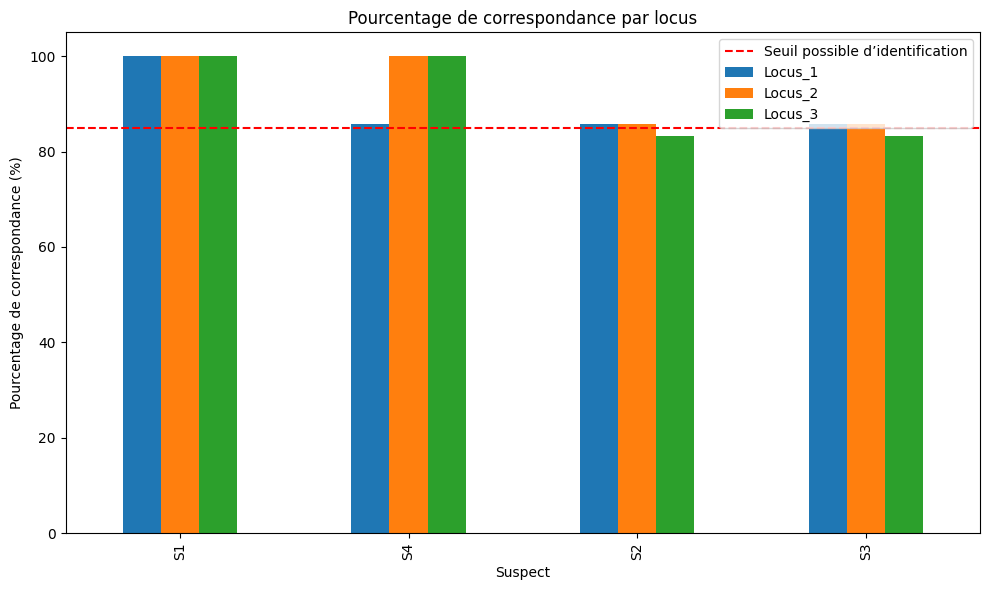

In [4]:
# === 4. Visualisation des r√©sultats ===

cor_df[["Locus_1", "Locus_2", "Locus_3"]].plot(kind='bar', figsize=(10, 6), title="Pourcentage de correspondance par locus")
plt.axhline(85, color='red', linestyle='--', label='Seuil possible d‚Äôidentification')
plt.ylabel("Pourcentage de correspondance (%)")
plt.xlabel("Suspect")
plt.legend()
plt.tight_layout()
plt.show()


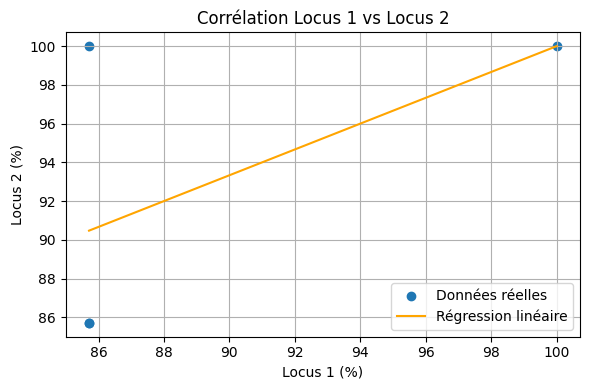

Coefficient de corr√©lation (R¬≤): 0.333


In [5]:
# === 5. Analyse statistique : r√©gression lin√©aire entre loci ===

# V√©rifions la coh√©rence entre locus 1 et locus 2 par exemple

x = cor_df["Locus_1"].values.reshape(-1, 1)
y = cor_df["Locus_2"].values

modele = LinearRegression()
modele.fit(x, y)
y_pred = modele.predict(x)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Donn√©es r√©elles')
plt.plot(x, y_pred, color='orange', label='R√©gression lin√©aire')
plt.xlabel("Locus 1 (%)")
plt.ylabel("Locus 2 (%)")
plt.title("Corr√©lation Locus 1 vs Locus 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Coefficient de corr√©lation (R¬≤):", round(modele.score(x, y), 3))


In [6]:
# === 6. Ajout d‚Äôincertitude al√©atoire pour simuler du bruit biologique ===

def ajouter_bruit(seq, taux_erreur=0.1):
    """Ajoute une petite erreur al√©atoire √† une s√©quence (simulateur de contamination)"""
    bases = ['A', 'T', 'C', 'G']
    nouvelle_seq = ""
    for base in seq:
        if np.random.rand() < taux_erreur:
            nouvelle_seq += np.random.choice([b for b in bases if b != base])
        else:
            nouvelle_seq += base
    return nouvelle_seq

# Simulons un nouvel √©chantillon bruit√©
np.random.seed(42)  # Pour reproductibilit√©
echantillon_bruite = {k: ajouter_bruit(v, 0.1) for k, v in echantillon.items()}
print("√âchantillon bruit√© :", echantillon_bruite)

# Recalcul des correspondances
correspondances_bruit = []

for suspect in df.index:
    matches = []
    for locus in ["Locus_1", "Locus_2", "Locus_3"]:
        score = comparer(df.loc[suspect, locus], echantillon_bruite[locus])
        matches.append(score)
    correspondances_bruit.append(matches)

cor_bruit_df = pd.DataFrame(correspondances_bruit, columns=["Locus_1", "Locus_2", "Locus_3"], index=df.index)
cor_bruit_df["Moyenne"] = cor_bruit_df.mean(axis=1)
cor_bruit_df.sort_values("Moyenne", ascending=False)


√âchantillon bruit√© : {'Locus_1': 'ATCGTAA', 'Locus_2': 'GGCTCAA', 'Locus_3': 'TAAAGC'}


Locus_1  Locus_2  Locus_3    Moyenne
Suspect                                      
S1         85.71    71.43    83.33  80.156667
S4         71.43    71.43    83.33  75.396667
S2         71.43    57.14    66.67  65.080000
S3         71.43    42.86    66.67  60.320000

In [7]:
# === 7. Conclusion automatique ===

meilleur_suspect = cor_df["Moyenne"].idxmax()
score = cor_df["Moyenne"].max()

if score > 85:
    print(f"üîç Le suspect le plus probable est {meilleur_suspect}, avec une correspondance moyenne de {score:.2f}%.")
else:
    print("‚ùóAucun suspect ne correspond suffisamment pour √™tre identifi√© avec confiance.")


üîç Le suspect le plus probable est S1, avec une correspondance moyenne de 100.00%.
